In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch import nn

print("Libraries imported successfully")

Libraries imported successfully


In [2]:
dir(nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'CircularPad1d',
 'CircularPad2d',
 'CircularPad3d',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout1d',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbed

In [3]:
dir(torch)

['AVG',
 'AggregationType',
 'AliasDb',
 'Any',
 'AnyType',
 'Argument',
 'ArgumentSpec',
 'AwaitType',
 'BFloat16Storage',
 'BFloat16Tensor',
 'BenchmarkConfig',
 'BenchmarkExecutionStats',
 'Block',
 'BoolStorage',
 'BoolTensor',
 'BoolType',
 'BufferDict',
 'ByteStorage',
 'ByteTensor',
 'CallStack',
 'Callable',
 'Capsule',
 'CharStorage',
 'CharTensor',
 'ClassType',
 'Code',
 'CompilationUnit',
 'CompleteArgumentSpec',
 'ComplexDoubleStorage',
 'ComplexFloatStorage',
 'ComplexType',
 'ConcreteModuleType',
 'ConcreteModuleTypeBuilder',
 'DeepCopyMemoTable',
 'DeserializationStorageContext',
 'DeviceObjType',
 'Dict',
 'DictType',
 'DisableTorchFunction',
 'DisableTorchFunctionSubclass',
 'DispatchKey',
 'DispatchKeySet',
 'DoubleStorage',
 'DoubleTensor',
 'EnumType',
 'ErrorReport',
 'ExcludeDispatchKeyGuard',
 'ExecutionPlan',
 'FatalError',
 'FileCheck',
 'FloatStorage',
 'FloatTensor',
 'FloatType',
 'FunctionSchema',
 'Future',
 'FutureType',
 'Generator',
 'Gradient',
 'Grap

In [4]:
# get the dataset
carNum = [3, 4, 5, 6, 7, 8, 9]
carNumNP = np.array(carNum, dtype = np.float32)
carNumNP = carNumNP.reshape(-1, 1)
carNumNP

#convert the numpy array to tensor
carNumT = Variable(torch.from_numpy(carNumNP))
print(carNumT)

tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])


In [5]:
#lets define the prices of car sell
carPrices = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
carPricesNP = np.array(carPrices, dtype =np.float32)
carPricesNP = carPricesNP.reshape(-1, 1)

#convert the numpy array to tensor
carPricesT = Variable(torch.from_numpy(carPricesNP))
carPricesT

tensor([[7.5000],
        [7.0000],
        [6.5000],
        [6.0000],
        [5.5000],
        [5.0000],
        [4.5000]])

In [ ]:
#lets visualize our data
plt.scatter(carPrices, carNum)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ vs Number of Car Sell")
plt.show()

In [19]:
# create a class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        
        #linear function
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)

In [20]:
#define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

In [21]:
#define the loss function
mse = nn.MSELoss()

In [31]:
#set optimization parameters
lr = 0.02    #setting the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [34]:
#train the model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    
    #optimization
    optimizer.zero_grad()
    
    #forward to get output
    results = model(carPricesT)
    
    #calculate loss
    loss = mse(results, carNumT)
    
    #backward propagation
    loss.backward()
    
    #updating parameters
    optimizer.step()
    
    #store loss
    loss_list.append(loss.data)
    
    #print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss{}'.format(iteration, loss.data))

epoch 0, loss9.571900367736816
epoch 50, loss7.728840351104736
epoch 100, loss6.955740928649902
epoch 150, loss6.259971618652344
epoch 200, loss5.633800029754639
epoch 250, loss5.0702619552612305
epoch 300, loss4.5630927085876465
epoch 350, loss4.106654644012451
epoch 400, loss3.695873260498047
epoch 450, loss3.326181650161743
epoch 500, loss2.9934706687927246
epoch 550, loss2.694039821624756
epoch 600, loss2.4245593547821045
epoch 650, loss2.1820361614227295
epoch 700, loss1.9637702703475952
epoch 750, loss1.7673383951187134
epoch 800, loss1.5905557870864868
epoch 850, loss1.4314552545547485
epoch 900, loss1.2882697582244873
epoch 950, loss1.1594041585922241
epoch 1000, loss1.0434311628341675


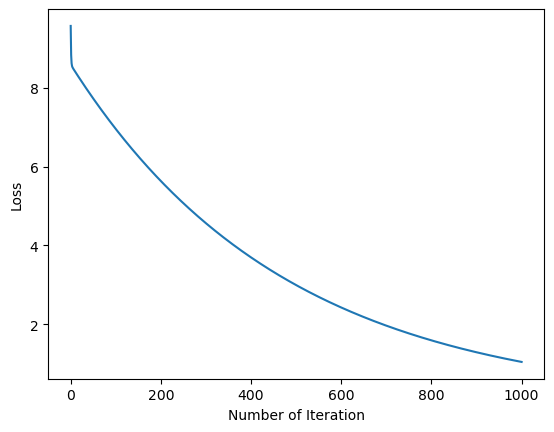

In [35]:
# plot the lost function falls
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iteration")
plt.ylabel("Loss")
plt.show()